# Подготовка исходных данных

#### Загрузка исходного датафрейма 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
data = df.copy()
test = df1.copy()
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Разборка с Rooms

In [7]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Text(0, 0.5, 'Price')

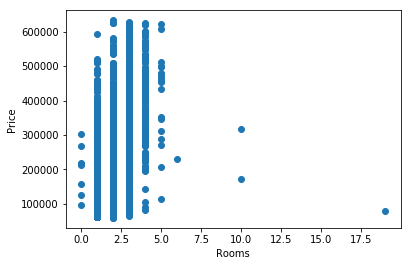

In [8]:
# Построим точечную диаграмму стоимости жилья от количества комнат
# Здесь имеется три выброса

plt.scatter(data['Rooms'], data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

In [9]:
data.loc[data['Rooms']==19, 'Square']

1454    42.006046
Name: Square, dtype: float64

In [10]:
data.loc[data['Rooms']==10, 'Square']

377     59.056975
8849    60.871266
Name: Square, dtype: float64

Площади этих квартир равны 42.006046, 59.056975, 60.871266. Проверим средние площади однокомнатных и двухкомнатных квартир

In [11]:
data.loc[data['Rooms']==1,'Square'].mean()

41.32327748796116

In [12]:
data.loc[data['Rooms']==2,'Square'].mean()

56.78821360752913

Анализируя эти площади и площади выбросов, можно сделать предположение, что в первом выбросе была 1-комнатная квартира,
а во втором - 2-комнатная.

In [13]:
# Также есть 6-комнатная квартира с небольшой площадью (предположим, что она должна быть двухкомнатной)

data.loc[data['Rooms']==6,['Square', 'Price']]

,Square,Price
2170,59.414334,229661.964416


In [14]:
# Напишем функцю, которая исправит выбросы с числом комнат.

def prepare_rooms(df):
    df.loc[data['Rooms']==10, 'Rooms'] = 2
    df.loc[data['Rooms']==19, 'Rooms'] = 1
    df.loc[data['Rooms']==6, 'Rooms'] = 2

In [15]:
prepare_rooms(data)

Text(0, 0.5, 'Price')

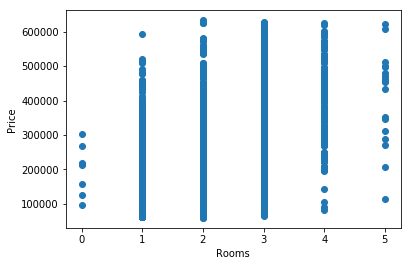

In [16]:
plt.scatter(data['Rooms'], data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

# Разборка со Square

Text(0, 0.5, 'Rooms')

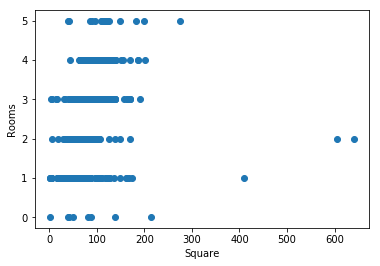

In [17]:
plt.scatter(data['Square'], data['Rooms'])
plt.xlabel('Square')
plt.ylabel('Rooms')

Text(0, 0.5, 'Price')

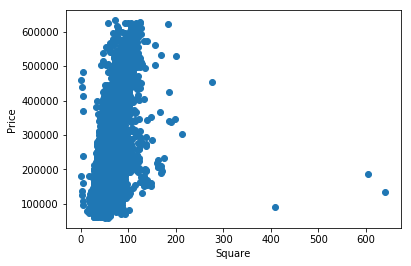

In [18]:
plt.scatter(data['Square'], data['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

In [19]:
# Рассмотрим квартиры, площадь которых > 250. Последние 3 - выбросы. Так как при большой площади, их стоимость невысока,
# а также низкое число комнат. Заменим их площади средними значениями для 1- и 2-хкомнатных квартир

df.loc[data['Square']>250, ['Id','Rooms', 'Square', 'Price']]

,Id,Rooms,Square,Price
1982,5548,5.0,275.645284,455264.882666
4262,28,2.0,604.705972,187717.242538
4690,2307,1.0,409.425181,90470.430830
6977,11602,2.0,641.065193,133529.681562


In [20]:
# Функция, которая устраняет выбросы с площадами

def prepare_square(df):
    df.loc[data['Id']==28, 'Square'] = df.loc[data['Rooms']==2, 'Square'].mean()
    df.loc[data['Id']==2307, 'Square'] = df.loc[data['Rooms']==1, 'Square'].mean()
    df.loc[data['Id']==11602, 'Square'] = df.loc[data['Rooms']==2, 'Square'].mean()

In [21]:
prepare_square(data)

Text(0, 0.5, 'Rooms')

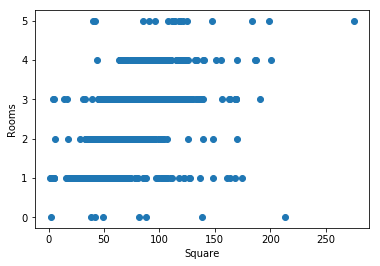

In [22]:
# Из точечной диаграммы видно, что выбросы устранены

plt.scatter(data['Square'], data['Rooms'])
plt.xlabel('Square')
plt.ylabel('Rooms')

Text(0, 0.5, 'Price')

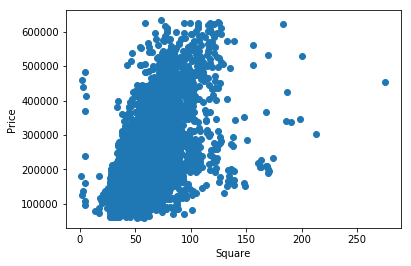

In [23]:
plt.scatter(data['Square'], data['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

In [24]:
# Сгруппируем данные по комнатам, вычислив среднюю площадь

square_rooms_info = data.groupby('Rooms')[['Square']].mean()
square_rooms_info

,Square
Rooms,
0.0,81.620358
1.0,41.224136
2.0,56.498913
3.0,76.903234
4.0,98.377544
5.0,122.614941


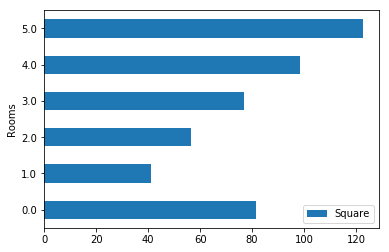

In [25]:
# Из диаграммы видно, что студии в среднем имеют площадь как 3-хкомнтные квариры

square_rooms_info.plot(kind='barh')
plt.show()

In [26]:
# Сгруппируем данные по комнатам, вычислив среднюю цену

price_rooms_info = data.groupby('Rooms')[['Price']].mean()
price_rooms_info

,Price
Rooms,
0.0,200435.886261
1.0,159828.813091
2.0,215275.231897
3.0,289337.962452
4.0,383251.100956
5.0,410431.605679


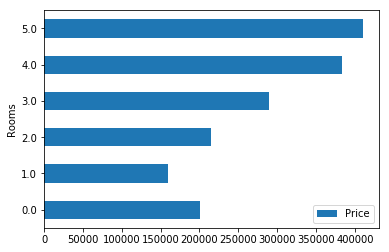

In [27]:
# Из диаграммы видно, что студии в среднем имеют цену как 2-хкомнтные квариры

price_rooms_info.plot(kind='barh')
plt.show()

In [28]:
# Студии имеют один выброс, плюс квартира с Id == 3159 должна быть однокомнатной

data.loc[data['Rooms']==0, ['Id','Square', 'KitchenSquare', 'Rooms','Price','HouseYear']]

,Id,Square,KitchenSquare,Rooms,Price,HouseYear
1397,12638,138.427694,0.0,0.0,268394.744389,2016
1981,7917,212.932361,0.0,0.0,302211.260887,2008
2269,7317,41.790881,0.0,0.0,98129.976788,1977
3911,770,49.483501,0.0,0.0,217009.338463,2015
4366,456,81.491446,0.0,0.0,212864.799112,1977
4853,3224,2.377248,0.0,0.0,126596.941798,1977
6149,3159,38.697117,9.0,0.0,158998.110646,1982
8834,9443,87.762616,0.0,0.0,219281.918007,1977


In [29]:
# Устраним его, заменив средним значением

data.loc[data['Id']==3224, 'Square'] = data.loc[data['Rooms']==0, 'Square'].mean()

In [30]:
# Сделаем квартиру с Id == 3159 однокомнатной

data.loc[data['Id']==3159, 'Rooms'] = 1

In [31]:
data.loc[data['Rooms']==0, ['Id','Square','KitchenSquare', 'Rooms','Price','HouseYear']]

,Id,Square,KitchenSquare,Rooms,Price,HouseYear
1397,12638,138.427694,0.0,0.0,268394.744389,2016
1981,7917,212.932361,0.0,0.0,302211.260887,2008
2269,7317,41.790881,0.0,0.0,98129.976788,1977
3911,770,49.483501,0.0,0.0,217009.338463,2015
4366,456,81.491446,0.0,0.0,212864.799112,1977
4853,3224,81.620358,0.0,0.0,126596.941798,1977
8834,9443,87.762616,0.0,0.0,219281.918007,1977


In [32]:
def prepare_square_1(df):
    df.loc[(df['Square']>df['Rooms']*45+45) & (df['Rooms']>0), 'Square'] = df['Rooms']*45 + 45
    df.loc[df['Square']<df['Rooms']*15, 'Square'] = df['Rooms']*15

In [33]:
prepare_square_1(data)

Text(0, 0.5, 'Price')

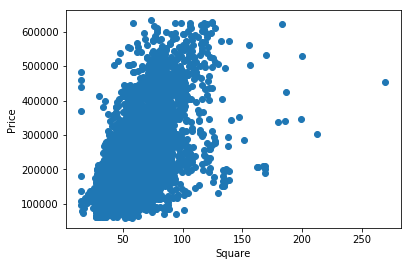

In [34]:
plt.scatter(data['Square'], data['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

In [35]:
# data.loc[data['Rooms']==2, ['Square', 'Rooms']].sort_values(by=['Square']).tail(50)

In [36]:
data.loc[data['LifeSquare'] + data['KitchenSquare']>data['Square'], ['KitchenSquare','LifeSquare','Square', 'Rooms']]

,KitchenSquare,LifeSquare,Square,Rooms
3,9.0,52.731512,53.352981,2.0
28,1.0,43.967759,42.530043,1.0
44,0.0,106.340403,104.211396,3.0
48,12.0,46.807989,47.080100,1.0
52,0.0,65.224603,61.400054,2.0
69,10.0,63.304605,64.929103,2.0
123,1.0,89.803753,85.952306,3.0
129,1.0,64.622603,65.102017,1.0
136,10.0,92.069236,92.400007,2.0
145,10.0,57.709149,60.366626,2.0


# Разборки с кухней

In [37]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.128108,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812682,18.812713,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,15.000000,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.784790,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.535436,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,270.000000,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


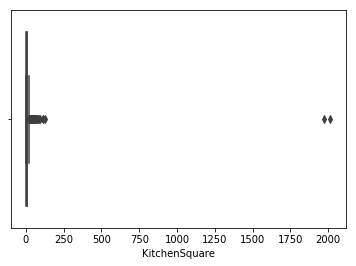

In [38]:
sns.boxplot(data['KitchenSquare'])

In [39]:
data['KitchenSquare'].mean()

6.2733

In [40]:
data['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0         2
37.0         2
32.0         2
30.0         2
58.0         2
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
53.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [41]:
# Выбросы:  1970.0, 2014.0. Устраним их.

In [42]:
 data.loc[data['KitchenSquare'] > 130, ['Id', 'KitchenSquare']]

,Id,KitchenSquare
1064,14656,2014.0
8584,14679,1970.0


In [43]:
# Заменим средними значениями

data.loc[data['Id'] == 14656, 'KitchenSquare'] = data['KitchenSquare'].mean()

In [44]:
data.loc[data['Id'] == 14679, 'KitchenSquare'] = data['KitchenSquare'].mean()

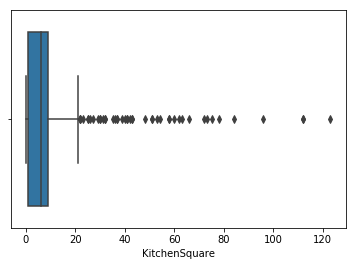

In [45]:
sns.boxplot(data['KitchenSquare'])

In [46]:
# Из диаграммы видно, что площади больше 20 являются выбросами
# Видно несоответствие KitchenSquare, Square и LifeSquare

data.loc[data['KitchenSquare'] > 20, ['Id','KitchenSquare', 'Square', 'LifeSquare']]

,Id,KitchenSquare,Square,LifeSquare
227,16395,72.0,79.722243,44.731219
551,1315,48.0,48.128114,45.023531
622,12924,22.0,92.473796,53.649526
1077,9690,37.0,40.081042,37.834964
1369,2371,66.0,68.841073,64.234956
1455,12507,78.0,79.810535,79.578961
1804,11459,22.0,90.000000,49.781722
1860,4265,53.0,53.216778,32.644859
1867,3267,43.0,138.980817,138.004600
1982,5548,26.0,270.000000,233.949309


In [47]:
data.loc[data['KitchenSquare'] > 20, 'KitchenSquare'] = data['KitchenSquare'].mean()

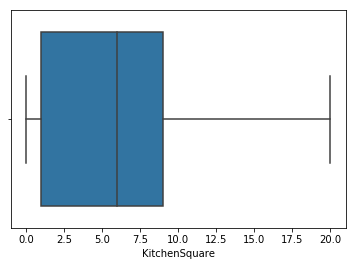

In [48]:
sns.boxplot(data['KitchenSquare'])

# Разборки с жилой площадью

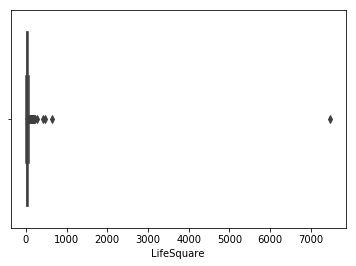

In [49]:
sns.boxplot(data['LifeSquare'])

In [50]:
data.loc[data['LifeSquare'] > 1000, ['Id','LifeSquare', 'Square']]

,Id,LifeSquare,Square
4328,16550,7480.592129,81.694417


In [51]:
data.loc[data['Id'] == 16550, 'LifeSquare'] = 60

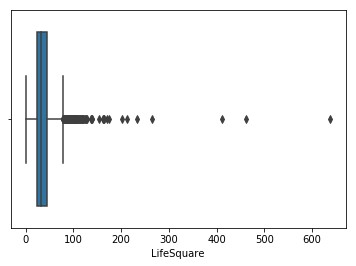

In [52]:
sns.boxplot(data['LifeSquare'])

In [53]:
data.loc[data['LifeSquare'] > 250, ['Id','LifeSquare', 'Square', 'KitchenSquare']]

,Id,LifeSquare,Square,KitchenSquare
590,14990,263.542020,48.449873,5.0
4690,2307,410.639749,41.323462,10.0
6977,11602,638.163193,56.649420,10.0
8437,15886,461.463614,78.059331,10.0


In [54]:
# Устраняем выбросы

data.loc[data['LifeSquare'] > 250, 'LifeSquare'] = data['Square'] - data['KitchenSquare']

In [55]:
# Исправляем случай, если жилая площадь больше общей

data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = data['Square'] - data['KitchenSquare']

In [56]:
# Исправляем случай, если жилая площадь с кухней больше общей

data.loc[data['LifeSquare'] + data['KitchenSquare'] > data['Square'], 'Square'] = data['LifeSquare'] + data['KitchenSquare'] + 10

In [57]:
data['LifeSquare'].mean()

35.72071813007516

In [58]:
data['Square'].mean()

56.65709095830332

In [59]:
# То есть в среднем жилая площадь составляет 72% от общей
# У нас имеются квартиры, в которых жилая площадь слишком маленькая по сравнению с общей

data.loc[data['LifeSquare'] < data['Square']*0.4, ['LifeSquare','Square','KitchenSquare','Rooms']]

,LifeSquare,Square,KitchenSquare,Rooms
26,0.641822,106.958871,0.0,3.0
95,4.091945,61.334968,1.0,2.0
134,5.589324,65.496674,1.0,2.0
158,4.896202,51.991064,1.0,3.0
160,3.987101,66.419841,1.0,1.0
210,18.062506,45.182329,9.0,1.0
270,5.941401,46.692974,1.0,1.0
279,4.634049,79.521221,1.0,2.0
350,17.367961,50.412729,11.0,1.0
363,1.251846,44.171793,1.0,1.0


In [60]:
data.loc[data['LifeSquare'] < data['Square']*0.4, 'LifeSquare'] = data['Square']*0.7

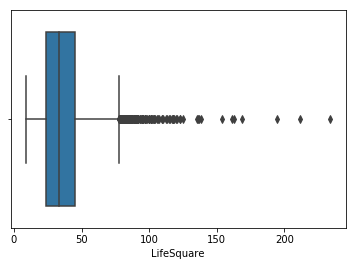

In [61]:
sns.boxplot(data['LifeSquare'])

In [62]:
# Исправляем случай, когда жилая площадь сильно меньше общей

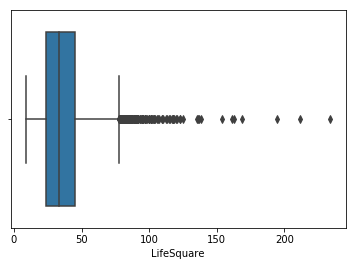

In [63]:
sns.boxplot(data['LifeSquare'])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [65]:
# Устраняем NAN

data['LifeSquare'] = data['LifeSquare'].fillna(data['Square']-data['KitchenSquare'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


# Разборки с HouseFloor

In [67]:
data.loc[data['Floor'] > data['HouseFloor'], 'HouseFloor'] = data['Floor']

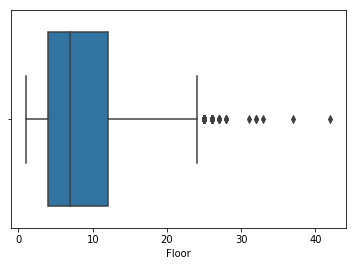

In [68]:
sns.boxplot(data['Floor'])

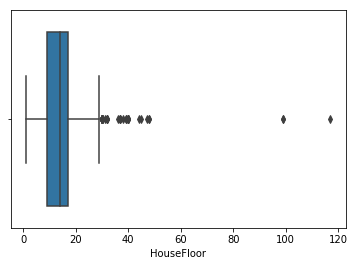

In [69]:
sns.boxplot(data['HouseFloor'])

In [70]:
data.loc[data['HouseFloor'] > 90, 'HouseFloor'] = data['Floor']

In [71]:
data['HouseFloor'].mean()

13.4061

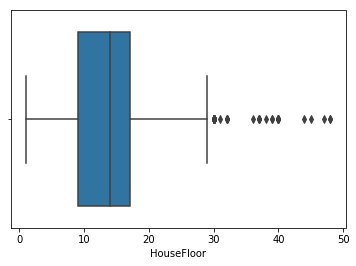

In [72]:
sns.boxplot(data['HouseFloor'])

# Разборки с HouseYear

In [73]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,71.731512,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [74]:
data.loc[data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [75]:
data.loc[data['Id']==10814, 'HouseYear'] = 2008
data.loc[data['Id']==11607, 'HouseYear'] = 1968

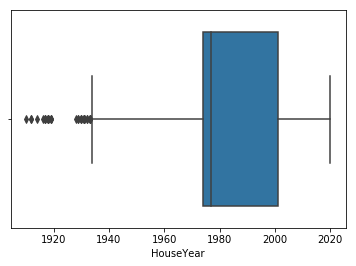

In [76]:
sns.boxplot(data['HouseYear'])

In [77]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886800,56.657091,41.462983,5.675165,8.526700,13.406100,1984.86600,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812682,19.113028,19.293207,3.874605,5.241148,5.883421,18.41187,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,15.000000,8.822988,0.000000,1.000000,1.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.991975,27.774618,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,53.216932,37.575440,6.000000,7.000000,14.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,66.401619,49.930465,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,270.000000,233.949309,20.000000,42.000000,48.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Обработка test

### Обработка Rooms

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [79]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [80]:
test['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [81]:
test.loc[test['Rooms']>5, ['Id', 'Rooms', 'Square']]

,Id,Rooms,Square
2071,10793,6.0,110.750226
3217,4058,6.0,223.453689
3398,1435,17.0,52.866107


In [82]:
test.groupby('Rooms')[['Square']].mean()

,Square
Rooms,
0.0,96.584677
1.0,40.943143
2.0,56.689144
3.0,77.201304
4.0,94.501365
5.0,115.788971
6.0,167.101957
17.0,52.866107


In [83]:
test.loc[test['Id']==1435, 'Rooms'] = 2

### Обработка Square 

Text(0, 0.5, 'Rooms')

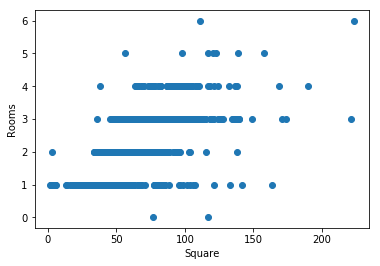

In [84]:
plt.scatter(test['Square'], test['Rooms'])
plt.xlabel('Square')
plt.ylabel('Rooms')

In [85]:
test.loc[(test['Square']>test['Rooms']*45+45) & (test['Rooms']>0), 'Square'] = test['Rooms']*45 + 45
test.loc[test['Square']<test['Rooms']*15, 'Square'] = test['Rooms']*15

Text(0, 0.5, 'Rooms')

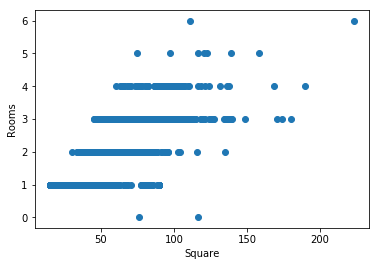

In [86]:
plt.scatter(test['Square'], test['Rooms'])
plt.xlabel('Square')
plt.ylabel('Rooms')

### Обработка KitchenSquare

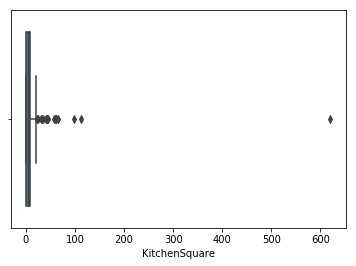

In [87]:
sns.boxplot(test['KitchenSquare'])

In [88]:
test.loc[test['KitchenSquare'] > 20, 'KitchenSquare'] = test['KitchenSquare'].mean()

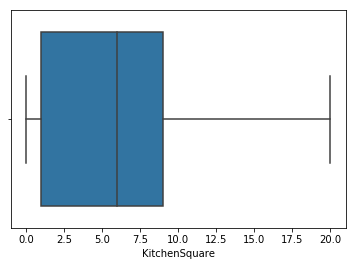

In [89]:
sns.boxplot(test['KitchenSquare'])

### Обработка LifeSquare 

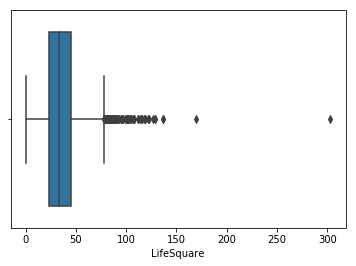

In [90]:
sns.boxplot(test['LifeSquare'])

In [91]:
test.loc[test['LifeSquare'] > test['Square'], 'LifeSquare'] = test['Square'] - test['KitchenSquare']

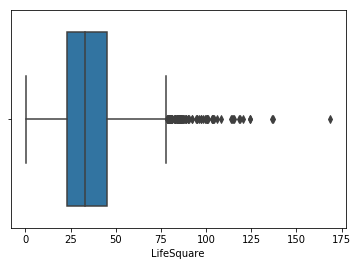

In [92]:
sns.boxplot(test['LifeSquare'])

In [93]:
test.loc[test['LifeSquare'] + test['KitchenSquare'] > test['Square'], 'Square'] = test['LifeSquare'] + test['KitchenSquare'] + 10

In [94]:
test.loc[test['LifeSquare'] < test['Square']*0.4, 'LifeSquare'] = test['Square']*0.7
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square']-test['KitchenSquare'])

In [95]:
test.loc[test['HouseFloor'] > 90, 'HouseFloor'] = test['Floor']

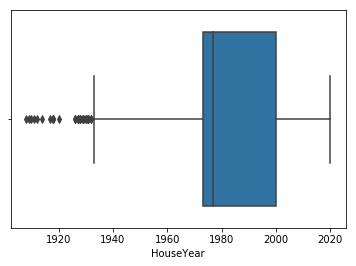

In [96]:
sns.boxplot(test['HouseYear'])

# Даммизация

In [97]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [98]:
data.shape

(10000, 20)

In [99]:
data.loc[:, ['Square','LifeSquare', 'KitchenSquare']].corr()

,Square,LifeSquare,KitchenSquare
Square,1.000000,0.836126,0.092299
LifeSquare,0.836126,1.000000,-0.366998
KitchenSquare,0.092299,-0.366998,1.000000


In [100]:
# Половины Healthcare_1 нет, поэтому удаляем

data.drop('Healthcare_1', axis = 1, inplace = True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


# Создание моделей

In [102]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
target = data['Price']
features = data[['Rooms', 'Square', 'LifeSquare']]

In [103]:
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size = 0.3, random_state = 42)

### Линейная регрессия 

In [104]:
model1 = LR()

In [105]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
y_pred = model1.predict(X_valid)

In [107]:
r2(y_valid, y_pred)

0.4190837679132532

### Случайный лес 

In [108]:
model2 = RF(n_estimators=120, max_depth=8, min_samples_leaf=3)

In [109]:
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [110]:
y_pred_2 = model2.predict(X_valid)

In [111]:
r2(y_valid, y_pred_2)

0.4553569164731741

#### Получены не очень хорошие результаты, поэтому будем синтезировать фичи 

In [112]:
# Выбрать фичи (использовать матрицу корреляции)
# Прикрутить фичи (цена от района, цена от количества комнат или цена на квадр. метр от р-на и т.д.)
# Плюс провести кластеризацию по раиону и году постройки

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [113]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [114]:
# Матрица корреляции

data.loc[:, ['Price','Square']].corr()

,Price,Square
Price,1.000000,0.571241
Square,0.571241,1.000000


In [115]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [116]:
# Обработаем District_Id

distr_info1 = train['DistrictId'].value_counts().reset_index().\
    rename(columns={'index':'DistrictId','DistrictId':'large_district'})

In [117]:
# Это топ районов с наибольшем количеством выставленных квартир на продажу. Сделаем гипотезу, что в этих районах
# цены должны быть ниже, так как предложение высокое
# Создадим еще одну переменную, она будет равна 1, если число предложений больше 100

In [118]:
distr_info1['is_large'] = (distr_info1['large_district'] > 100).astype(int)

In [119]:
distr_info1.head()

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1


In [120]:
# Чтобы объединить датафреймы, напишем функцию
# left - потому что из левого датафрейма нельзя потерять значения

def add_distr_info(df, distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['is_large'] = df['is_large'].fillna(0)
    df['large_district'] = df['large_district'].fillna(1)
    return df

In [121]:
#train = add_distr_info(train, distr_info1)

In [122]:
#train.head()

In [123]:
# То есть гипотеза о том, что чем больше предложений о продаже в районе, тем ниже цены, состоятельна

train.loc[:, ['Price','large_district','is_large']].corr()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Price,large_district,is_large
Price,1.0,NaN,NaN
large_district,NaN,NaN,NaN
is_large,NaN,NaN,NaN


In [124]:
# Добавим признак - средняя цена на комнату

price = train['Price'].mean()
price_mean_by_rooms=train.groupby(['Rooms'], as_index=False).agg({'Price':'mean'}).\
        rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'], as_index=False).agg({'Price':'mean'}).\
        rename(columns={'Price':'mean_price_dr'})

In [125]:
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160103.300229
2,2.0,215330.295609
3,3.0,290867.452543
4,4.0,385776.526291
5,5.0,386743.536446


In [126]:
# Если не будет значения по району в тестовой или валидационной выборке, мы заполним значение средним по комнате.
# Если и этого нет, то заполним значением price

In [127]:
def add_mean_price(df, price_mean_by_distr_rooms, price_mean_by_rooms, price):
    df=pd.merge(df, price_mean_by_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
    df=pd.merge(df, price_mean_by_rooms, on='Rooms', how='left')
    df['mean_price_dr']=df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr']=df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df

In [128]:
def prepare_data(df, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price):
    df = add_distr_info(df, distr_info1)
    df = add_mean_price(df, price_mean_by_distr_rooms, price_mean_by_rooms, price)
    return df

In [129]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,0,2,B,88504.384965
2603,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,B,B,46,9515,5,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,1,3,B,322048.433990


In [130]:
train = prepare_data(train, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [131]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,large_district,is_large,mean_price_dr,mean_price_by_rooms
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,1437,3,0,2,B,88504.384965,394,1,102427.030975,160103.300229
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,475,0,0,0,B,207007.956663,394,1,165911.129700,290867.452543
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,7227,0,1,6,A,182126.280899,21,0,169596.630515,160103.300229
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,9515,5,1,10,B,524365.550705,62,0,382424.639356,290867.452543
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,4048,3,1,3,B,322048.433990,28,0,251751.766701,290867.452543


In [132]:
feats = ['large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [133]:
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)

In [134]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [135]:
valid = prepare_data(valid, distr_info1, price_mean_by_distr_rooms, price_mean_by_rooms, price)

In [136]:
y_pred = model.predict(valid.loc[:, feats])

In [137]:
r2(valid['Price'], y_pred)

0.5195183523587652

In [138]:
r2(train['Price'], model.predict(train.loc[:, feats]))

0.662798197123948

### Прикрутим кластеризацию 

Text(0.5, 1.0, 'Train')

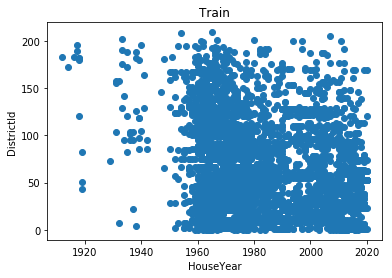

In [139]:
plt.scatter(train['HouseYear'], train['DistrictId'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('Train')

In [140]:
scaler = MinMaxScaler()

In [141]:
train_scaled = scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])
train_scaled

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.9537037 , 0.11004785],
       [0.60185185, 0.11004785],
       [0.68518519, 0.41626794],
       ...,
       [0.60185185, 0.00478469],
       [0.56481481, 0.44976077],
       [0.75      , 0.00956938]])

In [142]:
inertia_arr=[]
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.3431848228601
89.93523795191453
75.4878225357024
63.4514761493608
56.38962806028711
50.12326901734022


Text(0.5, 1.0, 'INERTIA')

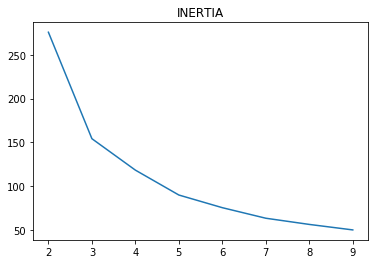

In [143]:
plt.plot([i for i in range (2, 10)], inertia_arr)
plt.title('INERTIA')

In [144]:
# Предполагаем, что на 4 кластерах достигнем наибольшего результата

In [145]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4)

In [146]:
train['cluster_year_distr'] = model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

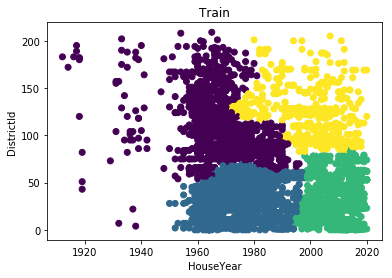

In [147]:
plt.scatter(train['HouseYear'], train['DistrictId'], c = train['cluster_year_distr'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('Train')

In [148]:
# В таблице появился cluster_year_distr

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             7000 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Ecology_2              7000 non-null object
Ecology_3              7000 non-null object
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Shops_2                7000 non-null object
Price                  7000 non-null float64
large_district         7000 non-null int64
is_large        

In [149]:
# Для того, чтобы это поле появилось и в тестовой или в валидационной выборке, нужно обучить модель классификации
# используем KNeighborsClassifier, так как он быстрый и простой

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(n_neighbors=4)

In [152]:
knn.fit(train_scaled, train['cluster_year_distr'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [153]:
# Преобразуем валидационную выборку

valid_scaled = scaler.transform(valid.loc[:, ['HouseYear', 'DistrictId']])

In [154]:
valid['cluster_year_distr'] = knn.predict(valid_scaled)

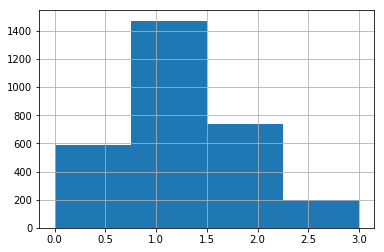

In [155]:
valid['cluster_year_distr'].hist(bins=4)

In [156]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,large_district,is_large,mean_price_dr,mean_price_by_rooms,cluster_year_distr
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,3,0,2,B,88504.384965,394,1,102427.030975,160103.300229,2
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,0,0,0,B,207007.956663,394,1,165911.129700,290867.452543,1
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,0,1,6,A,182126.280899,21,0,169596.630515,160103.300229,0
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,5,1,10,B,524365.550705,62,0,382424.639356,290867.452543,2
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,3,1,3,B,322048.433990,28,0,251751.766701,290867.452543,0


In [157]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,large_district,is_large,mean_price_dr,mean_price_by_rooms,cluster_year_distr
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,3,0,4,B,181530.459031,107.0,1.0,189591.187596,215330.295609,1
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,3,1,3,B,260456.004692,85.0,0.0,293153.148921,290867.452543,0
2,2239,6,3.0,82.882978,58.018085,1.0,8,17.0,1977,0.243205,...,0,0,0,B,219945.304640,355.0,1.0,212694.797384,290867.452543,1
3,15611,23,1.0,33.863324,29.993297,0.0,5,5.0,1977,0.034656,...,0,0,0,B,66883.280318,394.0,1.0,102427.030975,160103.300229,1
4,5634,52,1.0,43.095135,42.095135,1.0,10,17.0,1977,0.371149,...,1,2,5,B,114086.065201,96.0,0.0,135270.547115,160103.300229,1


In [158]:
# Новую фичу, полученную после кластеризации нужно преобразовать в дамми

In [159]:
# cluster_year_distr надо преобразовать в дами-переменные

def dummies(df, cluster_year_distr='cluster_year_distr'):
    df[cluster_year_distr]=df[cluster_year_distr].astype(object)
    df = pd.get_dummies(df)
    return df

In [160]:
train = dummies(train)

In [161]:
valid = dummies(valid)

In [162]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_distr_0,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,0,1,0,1,0,1,0,0,1,0
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,0,1,0,1,0,1,0,1,0,0
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,0,1,0,1,1,0,1,0,0,0
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,0,1,0,1,0,1,0,0,1,0
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,0,1,0,1,0,1,1,0,0,0


In [163]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_distr_0,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,0,1,0,1,0,1,0,1,0,0
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,0,1,0,1,0,1,1,0,0,0
2,2239,6,3.0,82.882978,58.018085,1.0,8,17.0,1977,0.243205,...,0,1,0,1,0,1,0,1,0,0
3,15611,23,1.0,33.863324,29.993297,0.0,5,5.0,1977,0.034656,...,0,1,0,1,0,1,0,1,0,0
4,5634,52,1.0,43.095135,42.095135,1.0,10,17.0,1977,0.371149,...,0,1,0,1,0,1,0,1,0,0


In [164]:
feats = ['cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3', 'large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [165]:
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)

In [166]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [167]:
y_pred = model.predict(valid.loc[:, feats])

In [168]:
r2(valid['Price'], y_pred)

0.559399939343795

In [169]:
r2(train['Price'], model.predict(train.loc[:, feats]))

0.7340542449171743

### Вычислим оптимальные параметры для модели 

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
# n_estimators - количество деревьев, которые будут участвовать в голосовании
# max_features - максимальное количество признаков, которые могут быть использованы при построении дерева
# max_depth - максимальная глубина дерева
# сочетание всех параметров - 60
parameters = [{'n_estimators': [30, 40, 50],
              'max_features': np.arange(2, 5),
              'max_depth': np.arange(7, 12)}]

In [172]:
# Создаем классификатор clf класса GridSearchCV
# Максимизируем accuracy
# cv - кросс-валидация. Равно 5, значит, датасет будет разбит на 5 частей (фолды). Модель строится 5 раз. 
# При первом построении модели 4 фолда используются в качестве тренировочного набора данных (на них модель обучается),
# а 5-й фолд - валидационный (на нем модель оценивается с помощью метрики, в данном случае - accuracy). При втором 
# построении модели в качестве валидационного фолда используется другой фолд, а остальные - валидационные.
clf = GridSearchCV(estimator=RF(random_state=42),
                  param_grid = parameters,
                  scoring = 'r2',
                  cv=3)

In [173]:
clf.fit(train.loc[:, feats], train['Price'])

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 40, 50], 'max_features': array([2, 3, 4]), 'max_depth': array([ 7,  8,  9, 10, 11])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [174]:
clf.best_params_

{'max_depth': 7, 'max_features': 4, 'n_estimators': 50}

In [175]:
model = RF(n_estimators = 50, max_depth = 7, random_state = 42)

In [176]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [177]:
y_pred = model.predict(valid.loc[:, feats])

In [178]:
r2(valid['Price'], y_pred)

0.5569852326270295

In [179]:
r2(train['Price'], model.predict(train.loc[:, feats]))

0.7115105686472332

In [180]:
#train.loc[:,['Square','Price','price_per_square']]

# Короч, надо сделать через среднюю цену на квадр метр по району

In [181]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_distr_0,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,0,1,0,1,0,1,0,0,1,0
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,0,1,0,1,0,1,0,1,0,0
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,0,1,0,1,1,0,1,0,0,0
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,0,1,0,1,0,1,0,0,1,0
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,0,1,0,1,0,1,1,0,0,0


In [182]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_distr_0,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,0,1,0,1,0,1,0,0,1,0
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,0,1,0,1,0,1,0,1,0,0
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,0,1,0,1,1,0,1,0,0,0
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,0,1,0,1,0,1,0,0,1,0
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,0,1,0,1,0,1,1,0,0,0


In [183]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'large_district',
       'is_large', 'mean_price_dr', 'mean_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3'],
      dtype='object')

In [184]:
data.loc[:, ['Price','Social_2']].corr()

,Price,Social_2
Price,1.000000,0.239226
Social_2,0.239226,1.000000


### Добавим фичу - цена на квадратный метр для данного района

In [185]:
# Вычисляем стоимость квадратного метра для каждого элемента

train['price_per_m2'] = train['Price'] / train['Square']

In [186]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_distr_0,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3,price_per_m2
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,1,0,1,0,1,0,0,1,0,2123.355436
1,5621,23,3.0,183.504222,161.504222,12.0,5,5.0,1977,0.014073,...,1,0,1,0,1,0,1,0,0,1128.082799
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,1,0,1,1,0,1,0,0,0,4586.393365
3,16258,48,3.0,96.056784,95.056784,1.0,15,15.0,2017,0.041125,...,1,0,1,0,1,0,0,1,0,5458.912203
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,1,0,1,0,1,1,0,0,0,4066.482466


In [187]:
# Вычисляем среднюю стоимость квадратного метра для каждого дистрикта (получим новый датасет)

ppm_for_dist=train.groupby(['DistrictId'], as_index=False).agg({'price_per_m2':'mean'}).rename(columns={'price_per_m2':'ppm_for_dist'})

In [188]:
# Вычисляем среднюю стоимость квадратного метра для каждого типа квартиры (1, 2, 3-хкомнатные)
# для каждого дистрикта (получим новый датасет)

ppm_for_dist_rooms=train.groupby(['DistrictId','Rooms'], as_index=False).agg({'price_per_m2':'mean'}).\
        rename(columns={'price_per_m2':'ppm_for_dist_rooms'})

In [189]:
ppm_for_dist.head()

,DistrictId,ppm_for_dist
0,0,3515.077201
1,1,3195.561625
2,2,4588.689001
3,3,3685.178167
4,4,4809.930246


In [190]:
ppm_for_dist_rooms.head()

,DistrictId,Rooms,ppm_for_dist_rooms
0,0,1.0,3245.799475
1,0,2.0,3683.101510
2,0,3.0,3741.587510
3,1,1.0,3345.664537
4,1,2.0,3146.716972


In [191]:
# Вычисляем среднюю цену на квадратный метр для каждого дистрикта

mean_ppm = ppm_for_dist['ppm_for_dist'].mean()
mean_ppm

4792.721075705167

In [192]:
# Функция соединения полученных датафреймов к исходному

def add_mean_price(df, ppm_for_dist_rooms, ppm_for_dist, mean_ppm):
    df=pd.merge(df, ppm_for_dist_rooms, on=['DistrictId', 'Rooms'], how='left')
    df=pd.merge(df, ppm_for_dist, on='DistrictId', how='left')
    df['ppm_for_dist_rooms']=df['ppm_for_dist_rooms'].fillna(df['ppm_for_dist'])
    df['ppm_for_dist_rooms']=df['ppm_for_dist_rooms'].fillna(mean_ppm)
    df['ppm_for_dist']=df['ppm_for_dist'].fillna(mean_ppm)
    return df

In [193]:
train = add_mean_price(train, ppm_for_dist_rooms, ppm_for_dist, mean_ppm)

In [194]:
valid = add_mean_price(valid, ppm_for_dist_rooms, ppm_for_dist, mean_ppm)

In [195]:
# Методом тыка определили, что результат лучше без Social_2

#feats = ['Rooms','ppm_for_dist', 'Square', 'Social_1' ,'Social_2', 'Floor', 'HouseFloor', 'Helthcare_2', 'Shops_1', 
#         'large_district', 'HouseYear', 'LifeSquare' , 'Social_3' , 'KitchenSquare', 'cluster_year_distr_0', 
#         'cluster_year_distr_1', 'cluster_year_distr_2', 'cluster_year_distr_3', 'Ecology_3_A', 'Shops_2_A']
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
        'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1',
        'Helthcare_2', 'Shops_1', 'large_district', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3','ppm_for_dist']
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)
model.fit(train.loc[:, feats], train['Price'])
y_pred = model.predict(valid.loc[:, feats])
r2(valid['Price'], y_pred)

0.7109015628780566

In [196]:
r2(train['Price'], model.predict(train.loc[:, feats]))

0.890386847921705

In [197]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'large_district',
       'is_large', 'mean_price_dr', 'mean_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3', 'price_per_m2', 'ppm_for_dist_rooms',
       'ppm_for_dist'],
      dtype='object')

In [198]:
train.loc[:, ['Price','Helthcare_2']].corr()

,Price,Helthcare_2
Price,1.000000,0.253601
Helthcare_2,0.253601,1.000000


### Кластеризуем по средней цене на метр и по району

In [199]:
# Можно еще по году постройки и средней цене на кв метр, этажности здания и средней цене на кв метр, району и средней цене
# на кв метр на районе

Text(0.5, 1.0, 'Train')

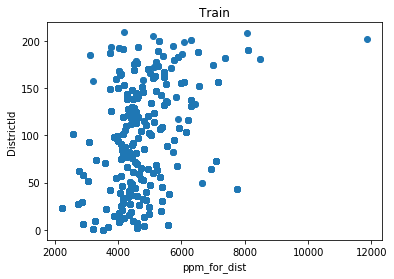

In [200]:
plt.scatter(train['ppm_for_dist'], train['DistrictId'])
plt.xlabel('ppm_for_dist')
plt.ylabel('DistrictId')
plt.title('Train')

In [201]:
train_scaled = scaler.fit_transform(train.loc[:,['ppm_for_dist','DistrictId']])
train_scaled

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.11004785],
       [0.        , 0.11004785],
       [0.2065316 , 0.41626794],
       ...,
       [0.0992689 , 0.00478469],
       [0.18355014, 0.44976077],
       [0.244184  , 0.00956938]])

In [202]:
inertia_arr=[]
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

144.05965826690897
90.99444832453017
67.5138503638995
50.95637171545088
42.347240719834446
33.922817253357096
26.538980715945254
23.610417221124827


Text(0.5, 1.0, 'INERTIA')

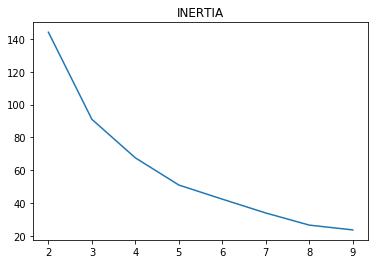

In [203]:
plt.plot([i for i in range (2, 10)], inertia_arr)
plt.title('INERTIA')

In [204]:
model = AgglomerativeClustering(n_clusters = 5)
train['cluster_dist_ppm'] = model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

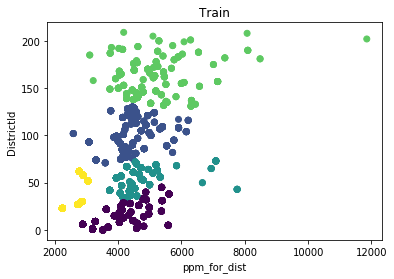

In [205]:
plt.scatter(train['ppm_for_dist'], train['DistrictId'], c = train['cluster_dist_ppm'])
plt.xlabel('ppm_for_dist')
plt.ylabel('DistrictId')
plt.title('Train')

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train['cluster_dist_ppm'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [207]:
valid_scaled = scaler.transform(valid.loc[:, ['ppm_for_dist','DistrictId']])

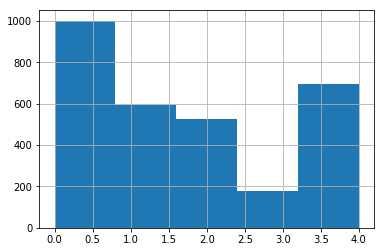

In [208]:
valid['cluster_dist_ppm'] = knn.predict(valid_scaled)
valid['cluster_dist_ppm'].hist(bins=5)

In [209]:
def dummies2(df, cluster_dist_ppm='cluster_dist_ppm'):
    df[cluster_dist_ppm]=df[cluster_dist_ppm].astype(object)
    df = pd.get_dummies(df)
    return df

In [210]:
train = dummies2(train)

In [211]:
valid = dummies2(valid)

In [212]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,cluster_year_distr_1,cluster_year_distr_2,cluster_year_distr_3,ppm_for_dist_rooms,ppm_for_dist,cluster_dist_ppm_0,cluster_dist_ppm_1,cluster_dist_ppm_2,cluster_dist_ppm_3,cluster_dist_ppm_4
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,...,1,0,0,3918.180602,4121.690927,1,0,0,0,0
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,...,0,0,0,4222.850865,4482.028758,0,0,1,0,0
2,2239,6,3.0,82.882978,58.018085,1.0,8,17.0,1977,0.243205,...,1,0,0,2648.131035,2882.278182,1,0,0,0,0
3,15611,23,1.0,33.863324,29.993297,0.0,5,5.0,1977,0.034656,...,1,0,0,2366.609220,2241.249713,0,0,0,0,1
4,5634,52,1.0,43.095135,42.095135,1.0,10,17.0,1977,0.371149,...,1,0,0,3283.036981,3047.661954,0,0,0,0,1


In [213]:
# В feats загружаем все признаки, а потом удаляем те, при удалении которых точность предсказания повышается.
# Как видно, часть исходных и синтетических признаков не вошло. Хотя кластеры по синтетическому признаку
# улучшили результат cluster_dist_ppm_0

feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
        'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1',
        'Helthcare_2', 'Shops_1', 'large_district', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3','ppm_for_dist', 'cluster_dist_ppm_0','cluster_dist_ppm_1','cluster_dist_ppm_2','cluster_dist_ppm_3','cluster_dist_ppm_4']
model = RF(n_estimators = 40, max_depth = 10, random_state = 42)
model.fit(train.loc[:, feats], train['Price'])
y_pred = model.predict(valid.loc[:, feats])
r2(valid['Price'], y_pred)

0.7126381105688553

In [214]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'large_district',
       'is_large', 'mean_price_dr', 'mean_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_distr_0', 'cluster_year_distr_1', 'cluster_year_distr_2',
       'cluster_year_distr_3', 'price_per_m2', 'ppm_for_dist_rooms',
       'ppm_for_dist', 'cluster_dist_ppm_0', 'cluster_dist_ppm_1',
       'cluster_dist_ppm_2', 'cluster_dist_ppm_3', 'cluster_dist_ppm_4'],
      dtype='object')